### Fake And Real News Data Detection

We will be using the [fake and real news data](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv) from kaggle to make this predictions possible.

The data will consist of two files. The files are in csv format which are the fake.csv and real.csv in the data folder; both data consist of 4 columns which are **The Title, Text, Subject and Date** 

### Project Objective

The main aim of this project is to clearly define what a fake news or a real news by using machine learning algorithms.

Before we need to load in the necessary the neccessary packages needed for this project

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

We have to load the data in using the pandas dataframe.

In [2]:
# we load in the fake data first 
fake_data = pd.read_csv("../data/Fake.csv")
fake_data.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [3]:
# we load in the real news data too
real_data = pd.read_csv("../data/True.csv")
real_data.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


Now the data contain four columns namely 
+ title
+ text 
+ subject 
+ date

But the two main attributes we will be using for the analysis is the **Title, Text**

We check if both data has null values or not so that we can do some imputations on these null values

In [4]:
# checking for the false data
fake_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [5]:
# checking for the real data too 
real_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

It seems per our observations there are no null values in the dataset. The next we can do is to combine the two datasets into one. **NB** but before we do that we need to add a label to each of the column. Now the *The True Data Set will have 1* and *the false dataset will have 0 as the label*

No this new label will have column name called Category

In [6]:
fake_data["category"] = 0
real_data["category"] = 1

In [7]:
# we can now check the new representation of the fake data
fake_data.head(10)

,title,text,subject,date,category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [8]:
# we can now check the presentation of the real data too
real_data.head(10)

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


In [9]:
# we can concat the two data set together 
df_news = pd.concat([fake_data, real_data], axis=0)

df_news.shape

(44898, 5)

so here we have a total of **44,898** news data both being real and fake. but we can make analysis on the data to get a through sense on how the data looks like.

In [10]:
# let's import the matplotlib library to make the work easier
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
[df_news["category"].value_counts().tolist()[0], df_news["category"].value_counts().tolist()[1]]

[23481, 21417]

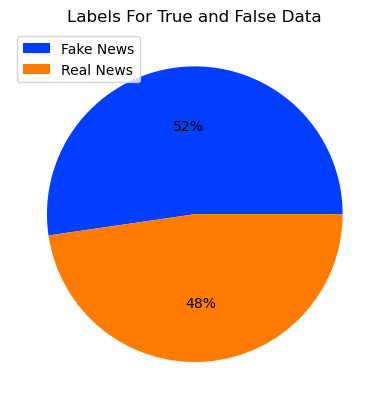

In [12]:
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright')

# plotting data on chart 
plt.pie([df_news["category"].value_counts().tolist()[0], df_news["category"].value_counts().tolist()[1]],
        colors=palette_color, autopct='%.0f%%') 
  
# displaying chart 
plt.legend(["Fake News", "Real News"])
plt.title("Labels For True and False Data")
plt.show() 

The pie chart above shows that the data has a small percentage dfifference in the fake and real news data. the false data has 
a higher percentage value than the real data. This means our predictions will be a little bit over **4%** fake predictions than real predictions

we can also check on the countplot of our subject so that we can the domains of our news data

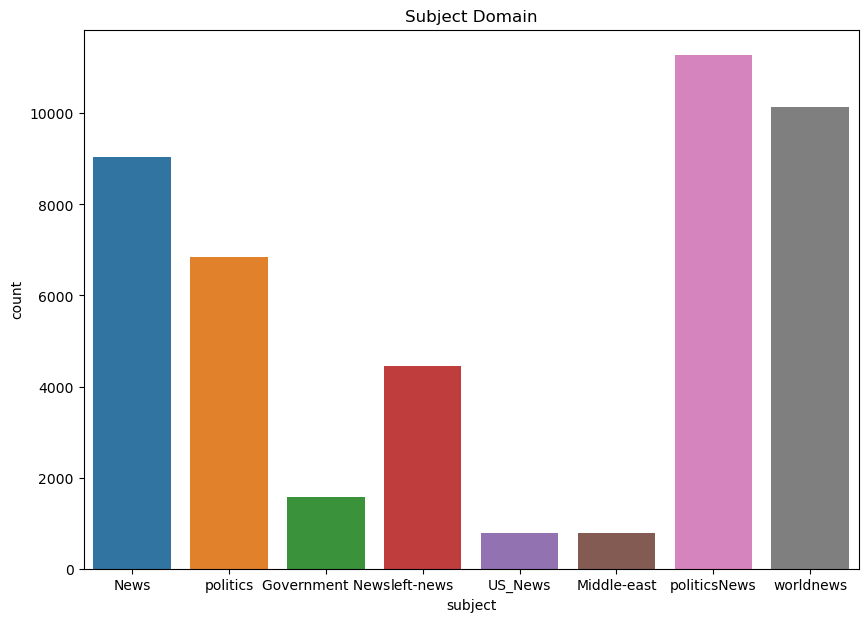

In [13]:
plt.figure(figsize=(10, 7))
sns.countplot(x="subject", data=df_news)
plt.title("Subject Domain")
plt.show()

We can also calculate the average length of an article

In [16]:
def average_lenght(df, header):

    # Calculate the length of each article
    df['article_length'] = df['text'].apply(lambda x: len(x.split()))

    # Calculate the average length of articles
    average_length = df['article_length'].mean()
    print(f"Average length of articles: {average_length:.2f} words")

    plt.figure(figsize=(10, 6))
    sns.histplot(df['article_length'], bins=50, kde=True)
    plt.title(header)
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    plt.show()


In [15]:
# finding the average length for the real data 

Average length of articles: 385.64 words


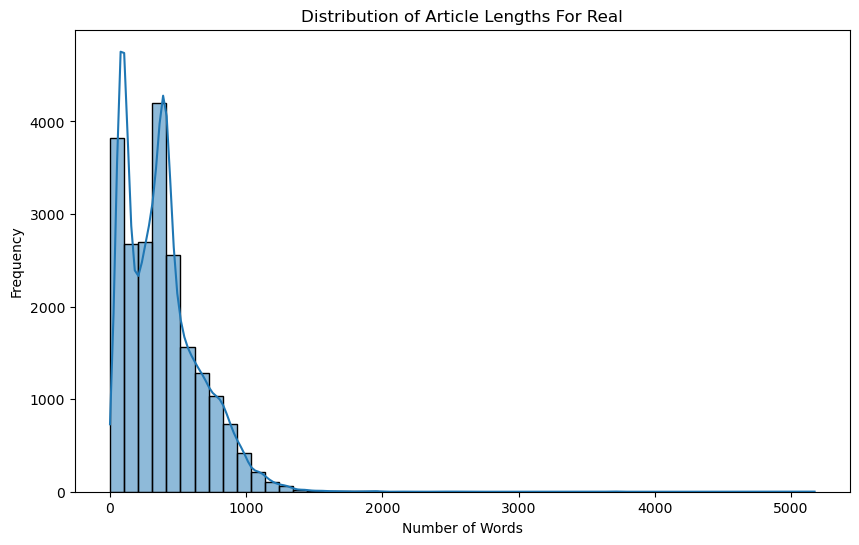

In [17]:
average_lenght(real_data, "Distribution of Article Lengths For Real")

Average length of articles: 423.20 words


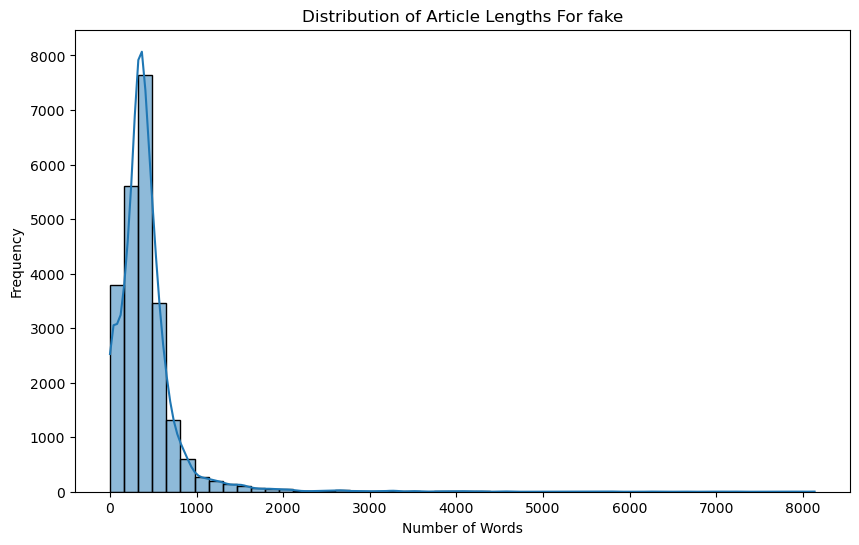

In [18]:
# average for fake data
average_lenght(fake_data, "Distribution of Article Lengths For fake")

Average length of articles: 405.28 words


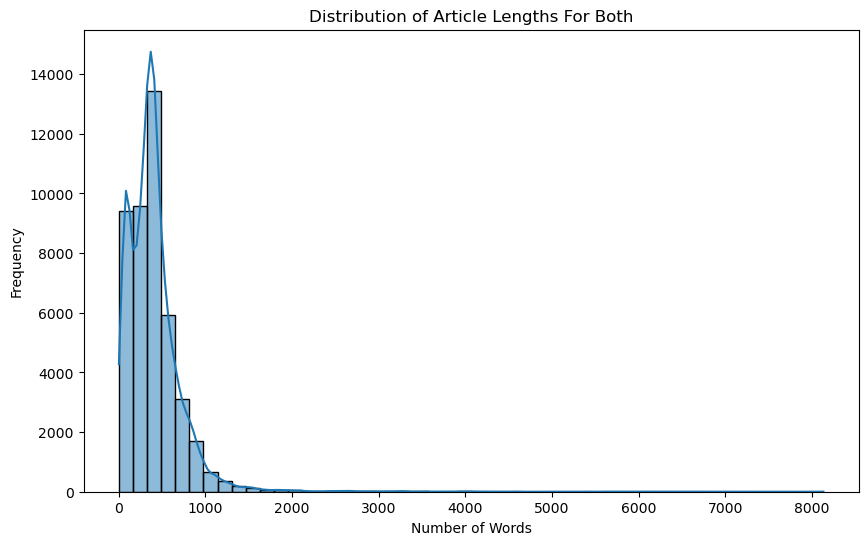

In [19]:
# for the two data combined
average_lenght(df_news, "Distribution of Article Lengths For Both")

we can find the most frequent words used,

In [27]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

# Download the necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\junio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\junio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[('said', 130186), ('trump', 128490), ('would', 54987), ('president', 52169), ('people', 41153), ('one', 35671), ('state', 32271), ('also', 31189), ('new', 30982), ('reuters', 28799), ('donald', 27682), ('clinton', 27542), ('house', 27123), ('obama', 27117), ('government', 26891), ('states', 26044), ('republican', 24355), ('could', 23939), ('united', 23554), ('told', 23347)]


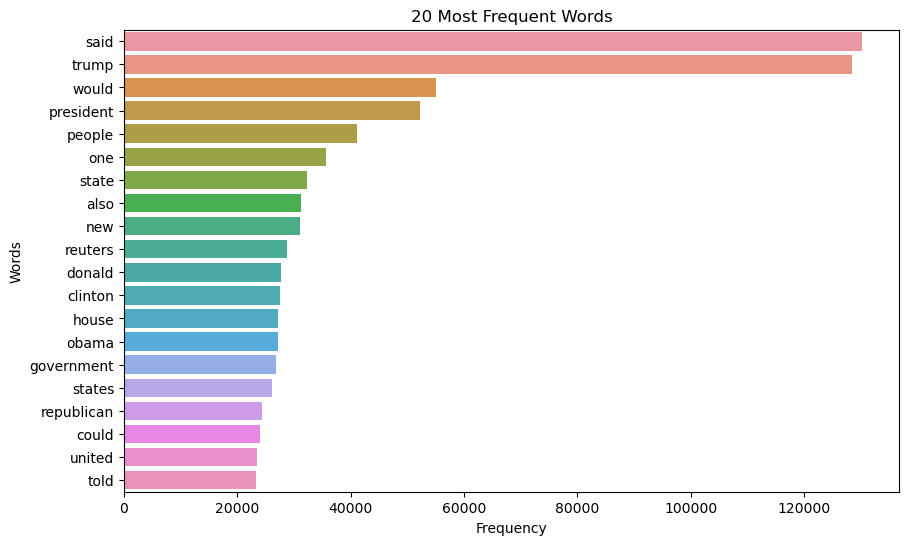

In [28]:

# Preload stopwords
stop_words = set(stopwords.words('english'))

# Ensure the 'text' column has no NaN values
df_news['text'] = df_news['text'].fillna('')

# Define a function to preprocess the text
def preprocess_text(text):
    try:
        # Tokenize the text
        tokens = word_tokenize(text.lower())
        # Remove punctuation and stopwords
        tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
        return tokens
    except Exception as e:
        print(f"Error processing text: {text}\nError: {e}")
        return []

# Apply the preprocessing function to the text
df_news['tokens'] = df_news['text'].apply(preprocess_text)

# Combine all tokens into a single list
all_tokens = [token for tokens in df_news['tokens'] for token in tokens]

# Count the frequency of each word
word_freq = Counter(all_tokens)

# Display the 20 most common words
common_words = word_freq.most_common(20)
print(common_words)

# Plot the most frequent words
words, counts = zip(*common_words)

# Convert to Pandas Series for better handling
words = pd.Series(words)
counts = pd.Series(counts)


plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title('20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


[('said', 99037), ('trump', 54249), ('would', 31526), ('reuters', 28412), ('president', 26397), ('state', 19728), ('government', 18288), ('new', 16784), ('house', 16519), ('states', 16515), ('also', 15946), ('united', 15576), ('republican', 15346), ('people', 15138), ('told', 14244), ('could', 13709), ('one', 12676), ('last', 12613), ('party', 12436), ('washington', 12419)]


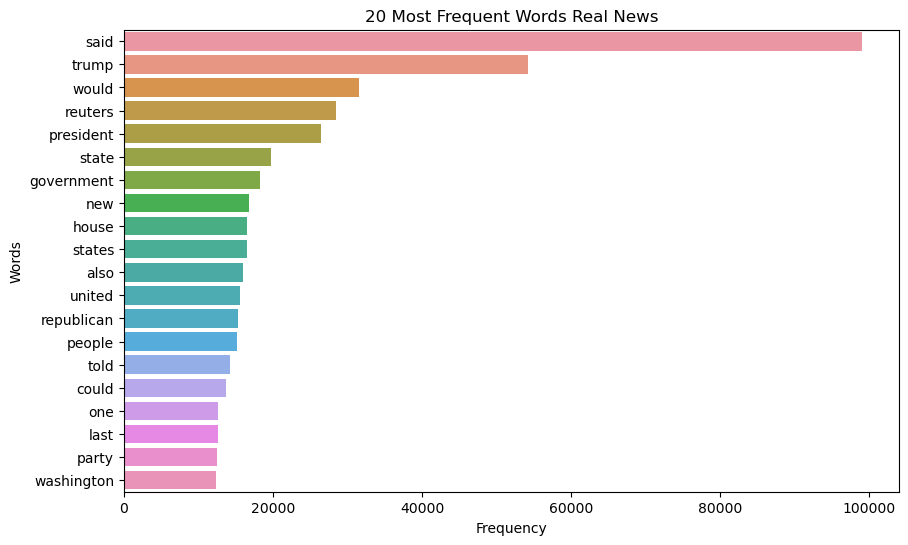

In [32]:
# for the real data

# Ensure the 'text' column has no NaN values
real_data['text'] = real_data['text'].fillna('')

# Define a function to preprocess the text
def preprocess_text(text):
    try:
        # Tokenize the text
        tokens = word_tokenize(text.lower())
        # Remove punctuation and stopwords
        tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
        return tokens
    except Exception as e:
        print(f"Error processing text: {text}\nError: {e}")
        return []

# Apply the preprocessing function to the text
real_data['tokens'] = real_data['text'].apply(preprocess_text)

# Combine all tokens into a single list
all_tokens = [token for tokens in real_data['tokens'] for token in tokens]

# Count the frequency of each word
word_freq = Counter(all_tokens)

# Display the 20 most common words
common_words = word_freq.most_common(20)
print(common_words)

# Plot the most frequent words
words, counts = zip(*common_words)

# Convert to Pandas Series for better handling
words = pd.Series(words)
counts = pd.Series(counts)


plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title('20 Most Frequent Words Real News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


[('trump', 74241), ('said', 31149), ('people', 26015), ('president', 25772), ('would', 23461), ('one', 22995), ('clinton', 18085), ('obama', 17920), ('like', 17660), ('donald', 17235), ('also', 15243), ('new', 14198), ('news', 14198), ('us', 13922), ('even', 13691), ('hillary', 13673), ('white', 12797), ('time', 12792), ('state', 12543), ('via', 11355)]


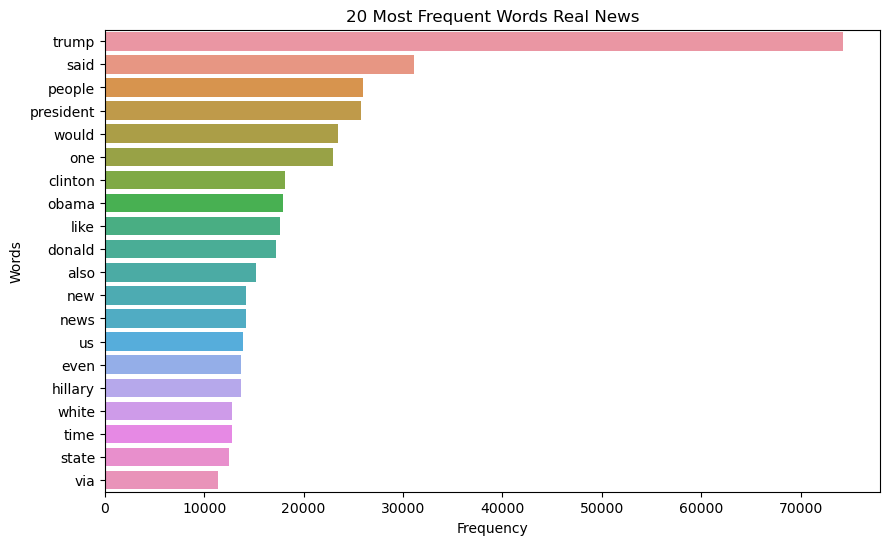

In [33]:
# for the real data
# Ensure the 'text' column has no NaN values
fake_data['text'] = fake_data['text'].fillna('')

# Define a function to preprocess the text
def preprocess_text(text):
    try:
        # Tokenize the text
        tokens = word_tokenize(text.lower())
        # Remove punctuation and stopwords
        tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
        return tokens
    except Exception as e:
        print(f"Error processing text: {text}\nError: {e}")
        return []

# Apply the preprocessing function to the text
fake_data['tokens'] = fake_data['text'].apply(preprocess_text)

# Combine all tokens into a single list
all_tokens = [token for tokens in fake_data['tokens'] for token in tokens]

# Count the frequency of each word
word_freq = Counter(all_tokens)

# Display the 20 most common words
common_words = word_freq.most_common(20)
print(common_words)

# Plot the most frequent words
words, counts = zip(*common_words)

# Convert to Pandas Series for better handling
words = pd.Series(words)
counts = pd.Series(counts)


plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=words)
plt.title('20 Most Frequent Words Real News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


Performing sentiment analysis

In [35]:
from nltk.sentiment import SentimentIntensityAnalyzer


# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def get_sentiment_score(text):
    return sia.polarity_scores(text)

# Apply sentiment analysis to the 'text' column
df_news['sentiment'] = df_news['text'].apply(get_sentiment_score)

# Extract specific sentiment scores (e.g., compound score)
df_news['sentiment_compound'] = df_news['sentiment'].apply(lambda x: x['compound'])

# Display the sentiment scores
print(df_news[['text', 'category', 'sentiment_compound']].head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\junio\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                text  category  \
0  Donald Trump just couldn t wish all Americans ...         0   
1  House Intelligence Committee Chairman Devin Nu...         0   
2  On Friday, it was revealed that former Milwauk...         0   
3  On Christmas day, Donald Trump announced that ...         0   
4  Pope Francis used his annual Christmas Day mes...         0   

   sentiment_compound  
0             -0.8681  
1             -0.7141  
2             -0.9958  
3             -0.9243  
4              0.5396  


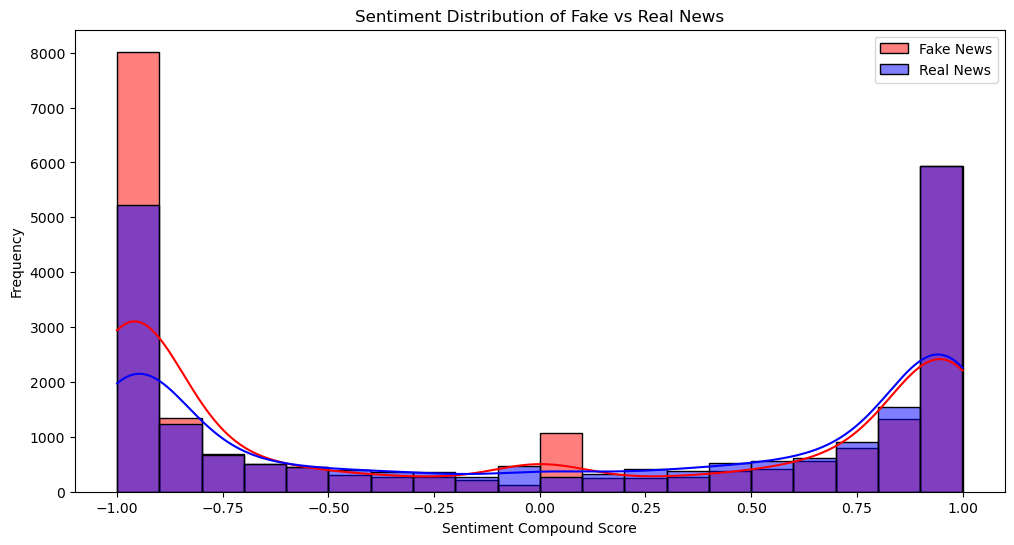

In [36]:
# Separate fake and real news
fake_news = df_news[df_news['category'] == 0]
real_news = df_news[df_news['category'] == 1]

# Plot the distribution of sentiment scores
plt.figure(figsize=(12, 6))

# Fake news sentiment distribution
sns.histplot(fake_news['sentiment_compound'], kde=True, color='red', label='Fake News', bins=20)

# Real news sentiment distribution
sns.histplot(real_news['sentiment_compound'], kde=True, color='blue', label='Real News', bins=20)

plt.title('Sentiment Distribution of Fake vs Real News')
plt.xlabel('Sentiment Compound Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [37]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(fake_news['sentiment_compound'], real_news['sentiment_compound'])

print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

T-Statistic: -18.51946934260562
P-Value: 2.770635468200406e-76
